# Total Spent Rescaling Analysis

**Attribute:** Total Spent  
**Methods Evaluated:** Min-Max Normalization, Z-Score Standardization, Robust Scaling  
**Recommended Method:** Robust Scaling  


## Overview

**Data Characteristics:**
- **Range:** Continuous, wide range ($5 - $500+)
- **Distribution:** Right-skewed (most transactions small, few large)
- **Outliers:** Present (high-value transactions from bulk purchases)
- **Nature:** Derived variable (Quantity × Price Per Unit)

**Source Dataset:** `final_cleaned_dataset.csv` (after missing data handling, BEFORE encoding)


## Step 1: Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pathlib import Path

# Configuration
INPUT_CSV = Path('../../output/1_handle_missing_data/final_cleaned_dataset.csv')
OUTPUT_DIR = Path('../../output/3_handle_rescale_data')
TOTAL_SPENT_COLUMN = 'Total Spent'

# Create output directory
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Load dataset
df = pd.read_csv(INPUT_CSV)

print(df.head())

## Step 2: Exploratory Data Analysis (EDA) and Outlier Detection

TOTAL SPENT - DESCRIPTIVE STATISTICS
count    11971.000000
mean       129.652577
std         94.750697
min          5.000000
25%         51.000000
50%        108.500000
75%        192.000000
max        410.000000
Name: Total Spent, dtype: float64

DISTRIBUTION ANALYSIS
Mean: $129.65
Median: $108.50
Standard Deviation: $94.75
Skewness: 0.8313

⚠️ Mean ($129.65) differs significantly from Median ($108.50)
   This indicates skewed distribution.
✓ Right-skewed distribution detected (skewness = 0.8313)

OUTLIER DETECTION (IQR METHOD)
Q1 (25th percentile): $51.00
Q3 (75th percentile): $192.00
IQR: $141.00
Lower Fence: $-160.50
Upper Fence: $403.50

Outliers detected: 60 (0.50% of data)

Outlier value range: $410.00 - $410.00
95th percentile: $320.00
99th percentile: $380.00
Maximum value: $410.00


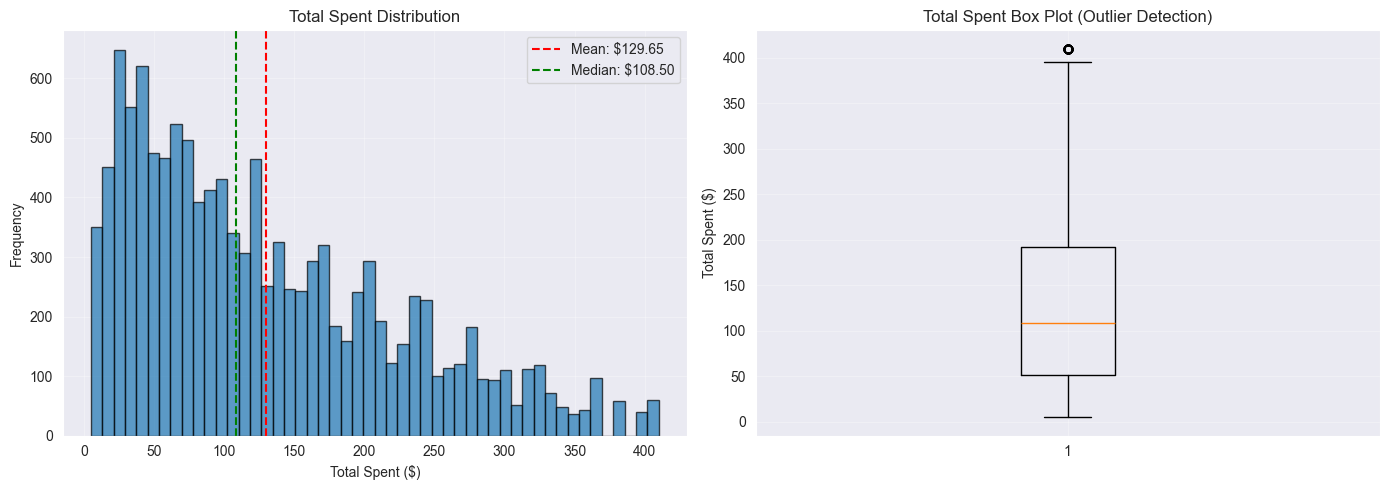


✓ EDA completed


In [11]:
# Basic statistics
print("TOTAL SPENT - DESCRIPTIVE STATISTICS")
print(df[TOTAL_SPENT_COLUMN].describe())

# Distribution analysis
print("DISTRIBUTION ANALYSIS")
mean_val = df[TOTAL_SPENT_COLUMN].mean()
median_val = df[TOTAL_SPENT_COLUMN].median()
std_val = df[TOTAL_SPENT_COLUMN].std()
skewness = df[TOTAL_SPENT_COLUMN].skew()

print(f"Mean: ${mean_val:.2f}")
print(f"Median: ${median_val:.2f}")
print(f"Standard Deviation: ${std_val:.2f}")
print(f"Skewness: {skewness:.4f}")


# Outlier detection using IQR method
print("OUTLIER DETECTION (IQR METHOD)")

Q1 = df[TOTAL_SPENT_COLUMN].quantile(0.25)
Q3 = df[TOTAL_SPENT_COLUMN].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = df[(df[TOTAL_SPENT_COLUMN] < lower_fence) | (df[TOTAL_SPENT_COLUMN] > upper_fence)]
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(df)) * 100

print(f"Q1 (25th percentile): ${Q1:.2f}")
print(f"Q3 (75th percentile): ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower Fence: ${lower_fence:.2f}")
print(f"Upper Fence: ${upper_fence:.2f}")
print(f"\nOutliers detected: {outlier_count} ({outlier_percentage:.2f}% of data)")

if outlier_count > 0:
    print(f"\nOutlier value range: ${outliers[TOTAL_SPENT_COLUMN].min():.2f} - ${outliers[TOTAL_SPENT_COLUMN].max():.2f}")
    print(f"95th percentile: ${df[TOTAL_SPENT_COLUMN].quantile(0.95):.2f}")
    print(f"99th percentile: ${df[TOTAL_SPENT_COLUMN].quantile(0.99):.2f}")
    print(f"Maximum value: ${df[TOTAL_SPENT_COLUMN].max():.2f}")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TOTAL_SPENT_COLUMN], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: ${mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='--', label=f'Median: ${median_val:.2f}')
axes[0].set_xlabel('Total Spent ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Total Spent Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df[TOTAL_SPENT_COLUMN], vert=True)
axes[1].set_ylabel('Total Spent')
axes[1].set_title('Total Spent Box Plot (Outlier Detection)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Apply All Three Rescaling Methods

In [12]:
print("APPLYING RESCALING METHODS")
# 1. Min-Max Normalization
min_max_scaler = MinMaxScaler()
df['TotalSpent_Normalized'] = min_max_scaler.fit_transform(df[[TOTAL_SPENT_COLUMN]])

# 2. Z-Score Standardization
standard_scaler = StandardScaler()
df['TotalSpent_Standardized'] = standard_scaler.fit_transform(df[[TOTAL_SPENT_COLUMN]])
# 3. Robust Scaling
robust_scaler = RobustScaler()
df['TotalSpent_Robust'] = robust_scaler.fit_transform(df[[TOTAL_SPENT_COLUMN]])


APPLYING RESCALING METHODS
✓ Min-Max Normalization applied
✓ Z-Score Standardization applied
✓ Robust Scaling applied

All three methods applied successfully
New columns: TotalSpent_Normalized, TotalSpent_Standardized, TotalSpent_Robust


## Step 4: Compare Methods - Statistical Summary and Visualization

METHOD COMPARISON - STATISTICAL SUMMARY
         Method                  Column       Min        Max          Mean     Median   Std Dev
       Original             Total Spent  5.000000 410.000000  1.296526e+02 108.500000 94.750697
  Normalization   TotalSpent_Normalized  0.000000   1.000000  3.077841e-01   0.255556  0.233952
Standardization TotalSpent_Standardized -1.315640   2.958914 -4.095518e-17  -0.223254  1.000042
 Robust Scaling       TotalSpent_Robust -0.734043   2.138298  1.500183e-01   0.000000  0.671991

VISUAL COMPARISON


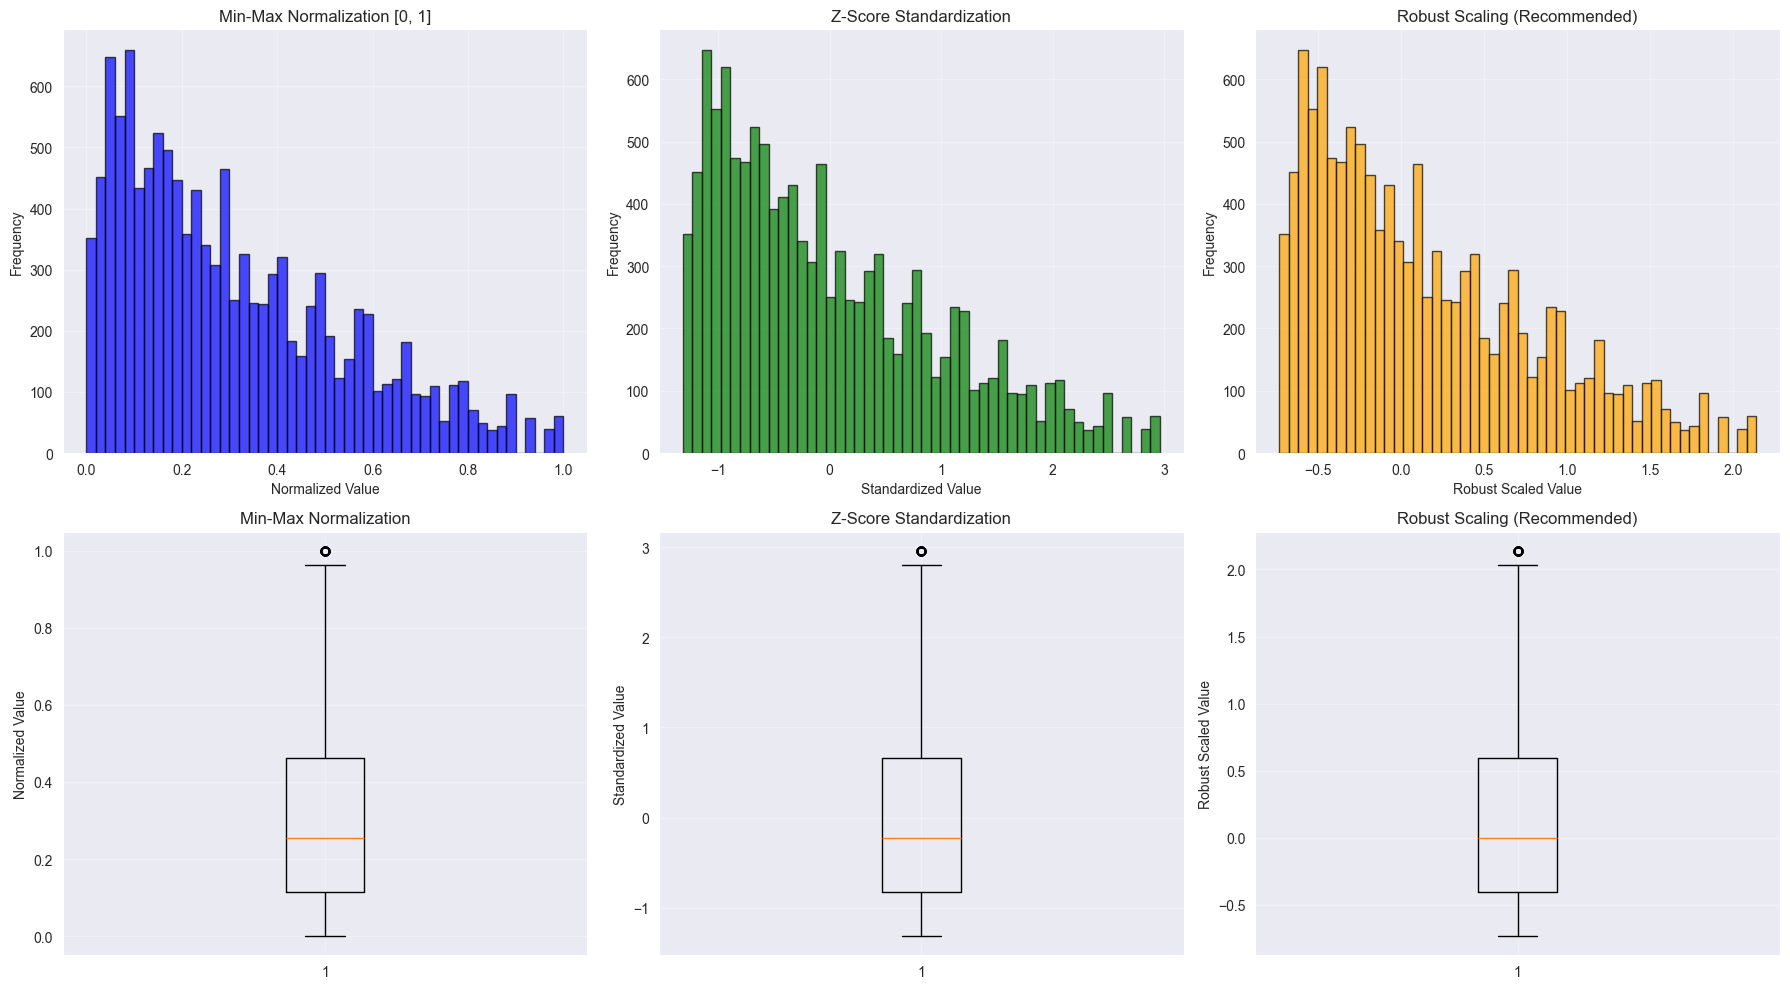


✓ Visual comparison completed


In [14]:
# Comparison table
print("METHOD COMPARISON - STATISTICAL SUMMARY")

comparison_df = pd.DataFrame({
    'Method': ['Original', 'Normalization', 'Standardization', 'Robust Scaling'],
    'Column': [TOTAL_SPENT_COLUMN, 'TotalSpent_Normalized', 'TotalSpent_Standardized', 'TotalSpent_Robust'],
    'Min': [
        df[TOTAL_SPENT_COLUMN].min(),
        df['TotalSpent_Normalized'].min(),
        df['TotalSpent_Standardized'].min(),
        df['TotalSpent_Robust'].min()
    ],
    'Max': [
        df[TOTAL_SPENT_COLUMN].max(),
        df['TotalSpent_Normalized'].max(),
        df['TotalSpent_Standardized'].max(),
        df['TotalSpent_Robust'].max()
    ],
    'Mean': [
        df[TOTAL_SPENT_COLUMN].mean(),
        df['TotalSpent_Normalized'].mean(),
        df['TotalSpent_Standardized'].mean(),
        df['TotalSpent_Robust'].mean()
    ],
    'Median': [
        df[TOTAL_SPENT_COLUMN].median(),
        df['TotalSpent_Normalized'].median(),
        df['TotalSpent_Standardized'].median(),
        df['TotalSpent_Robust'].median()
    ],
    'Std Dev': [
        df[TOTAL_SPENT_COLUMN].std(),
        df['TotalSpent_Normalized'].std(),
        df['TotalSpent_Standardized'].std(),
        df['TotalSpent_Robust'].std()
    ]
})

print(comparison_df.to_string(index=False))

# Visualize all three methods side-by-side
print("VISUAL COMPARISON")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Histograms
axes[0, 0].hist(df['TotalSpent_Normalized'], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 0].set_title('Min-Max Normalization [0, 1]')
axes[0, 0].set_xlabel('Normalized Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df['TotalSpent_Standardized'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Z-Score Standardization')
axes[0, 1].set_xlabel('Standardized Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(df['TotalSpent_Robust'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Robust Scaling (Recommended)')
axes[0, 2].set_xlabel('Robust Scaled Value')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

# Row 2: Box plots
axes[1, 0].boxplot(df['TotalSpent_Normalized'], vert=True)
axes[1, 0].set_title('Min-Max Normalization')
axes[1, 0].set_ylabel('Normalized Value')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(df['TotalSpent_Standardized'], vert=True)
axes[1, 1].set_title('Z-Score Standardization')
axes[1, 1].set_ylabel('Standardized Value')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].boxplot(df['TotalSpent_Robust'], vert=True)
axes[1, 2].set_title('Robust Scaling (Recommended)')
axes[1, 2].set_ylabel('Robust Scaled Value')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 5: Outlier Impact Analysis

In [15]:
print("OUTLIER IMPACT ANALYSIS")

if outlier_count > 0:
    # Get outlier indices
    outlier_indices = outliers.index
    
    # Sample outliers for comparison
    sample_size = min(5, outlier_count)
    sample_outliers = outliers.nlargest(sample_size, TOTAL_SPENT_COLUMN)

    
    for idx in sample_outliers.index:
        original = df.loc[idx, TOTAL_SPENT_COLUMN]
        normalized = df.loc[idx, 'TotalSpent_Normalized']
        standardized = df.loc[idx, 'TotalSpent_Standardized']
        robust = df.loc[idx, 'TotalSpent_Robust']
        
        print(f"\nOriginal: ${original:.2f}")
        print(f"Normalized: {normalized:.4f}  (range [0,1])")
        print(f"Standardized: {standardized:.4f}  (unbounded)")
        print(f"Robust: {robust:.4f}  (unbounded, median-centered)")
    
    # Outlier range comparison
    print("OUTLIER RANGE COMPARISON")
    
    outlier_comparison = pd.DataFrame({
        'Method': ['Normalization', 'Standardization', 'Robust Scaling'],
        'Outlier Min': [
            df.loc[outlier_indices, 'TotalSpent_Normalized'].min(),
            df.loc[outlier_indices, 'TotalSpent_Standardized'].min(),
            df.loc[outlier_indices, 'TotalSpent_Robust'].min()
        ],
        'Outlier Max': [
            df.loc[outlier_indices, 'TotalSpent_Normalized'].max(),
            df.loc[outlier_indices, 'TotalSpent_Standardized'].max(),
            df.loc[outlier_indices, 'TotalSpent_Robust'].max()
        ],
        'Non-Outlier 95th %ile': [
            df.loc[~df.index.isin(outlier_indices), 'TotalSpent_Normalized'].quantile(0.95),
            df.loc[~df.index.isin(outlier_indices), 'TotalSpent_Standardized'].quantile(0.95),
            df.loc[~df.index.isin(outlier_indices), 'TotalSpent_Robust'].quantile(0.95)
        ]
    })
    
    print(outlier_comparison.to_string(index=False))


OUTLIER IMPACT ANALYSIS

Analyzing 60 outliers...

Top 5 Outliers - How Each Method Handles Them:
--------------------------------------------------------------------------------

Original: $410.00
  → Normalized:    1.0000  (range [0,1])
  → Standardized:  2.9589  (unbounded)
  → Robust:        2.1383  (unbounded, median-centered)

Original: $410.00
  → Normalized:    1.0000  (range [0,1])
  → Standardized:  2.9589  (unbounded)
  → Robust:        2.1383  (unbounded, median-centered)

Original: $410.00
  → Normalized:    1.0000  (range [0,1])
  → Standardized:  2.9589  (unbounded)
  → Robust:        2.1383  (unbounded, median-centered)

Original: $410.00
  → Normalized:    1.0000  (range [0,1])
  → Standardized:  2.9589  (unbounded)
  → Robust:        2.1383  (unbounded, median-centered)

Original: $410.00
  → Normalized:    1.0000  (range [0,1])
  → Standardized:  2.9589  (unbounded)
  → Robust:        2.1383  (unbounded, median-centered)

OUTLIER RANGE COMPARISON
         Method  Out

## Step 6: Save All Output Files

In [17]:
# Save all three versions
output_files = {
    'normalization': OUTPUT_DIR / 'data_rescaling_norm_total_spent.csv',
    'standardization': OUTPUT_DIR / 'data_rescaling_std_total_spent.csv',
    'robust': OUTPUT_DIR / 'data_rescaling_robust_total_spent.csv'
}

# Save normalized version
df.to_csv(output_files['normalization'], index=False)

# Save standardized version
df.to_csv(output_files['standardization'], index=False)

# Save robust scaled version (recommended)
df.to_csv(output_files['robust'], index=False)

SAVING OUTPUT FILES
✓ Saved: data_rescaling_norm_total_spent.csv
✓ Saved: data_rescaling_std_total_spent.csv
✓ Saved: data_rescaling_robust_total_spent.csv

All output files saved to: ../../output_data/total_spent

📁 Output files contain:
   - All original columns from final_cleaned_dataset.csv
   - TotalSpent_Normalized (Min-Max scaled)
   - TotalSpent_Standardized (Z-Score scaled)
   - TotalSpent_Robust (Robust scaled - RECOMMENDED)
